In [1]:
from helper import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# returns of load_csv_data function
"""
x_train (np.array): training data
x_test (np.array): test data
y_train (np.array): labels for training data in format (-1,1)
train_ids (np.array): ids of training data
test_ids (np.array): ids of test data
"""
# load data
x_train, x_test, y_train, train_ids, test_ids = load_csv_data(".\dataset_to_release", sub_sample=False)

In [15]:
		
print(x_train.shape)
print(x_train[:, 1])

(328135, 321)
[11. 12. 10. ... 10. 12.  9.]


In [21]:
unique = np.unique(x_train[:, 10])
print(unique)

[ 1.  2. nan]


In [43]:
non_unique_cols = []
for ind in range(x_train.shape[1]):
    num_unique = len(np.unique(x_train[:, ind]))
    if num_unique > 100:
        non_unique_cols.append(ind)

In [46]:
print(non_unique_cols)
print(len(non_unique_cols))

[2, 7, 8, 62, 63, 81, 82, 83, 84, 85, 86, 89, 90, 93, 94, 105, 143, 219, 220, 222, 226, 228, 229, 251, 252, 253, 264, 267, 269, 271, 276, 277, 287, 288, 291, 292, 293, 295, 296, 299, 300, 301, 302, 303, 304]
45


In [94]:
letters = []
for element in non_unique_cols:
    letters.append(chr(65+int(element/26)) + chr(65+element%26) + ": " + str(element))
print(letters)

['AC: 2', 'AH: 7', 'AI: 8', 'CK: 62', 'CL: 63', 'DD: 81', 'DE: 82', 'DF: 83', 'DG: 84', 'DH: 85', 'DI: 86', 'DL: 89', 'DM: 90', 'DP: 93', 'DQ: 94', 'EB: 105', 'FN: 143', 'IL: 219', 'IM: 220', 'IO: 222', 'IS: 226', 'IU: 228', 'IV: 229', 'JR: 251', 'JS: 252', 'JT: 253', 'KE: 264', 'KH: 267', 'KJ: 269', 'KL: 271', 'KQ: 276', 'KR: 277', 'LB: 287', 'LC: 288', 'LF: 291', 'LG: 292', 'LH: 293', 'LJ: 295', 'LK: 296', 'LN: 299', 'LO: 300', 'LP: 301', 'LQ: 302', 'LR: 303', 'LS: 304']


In [53]:
x = []
for ind in range(x_train.shape[1]):
    x.append(len(np.unique(x_train[:, ind])))

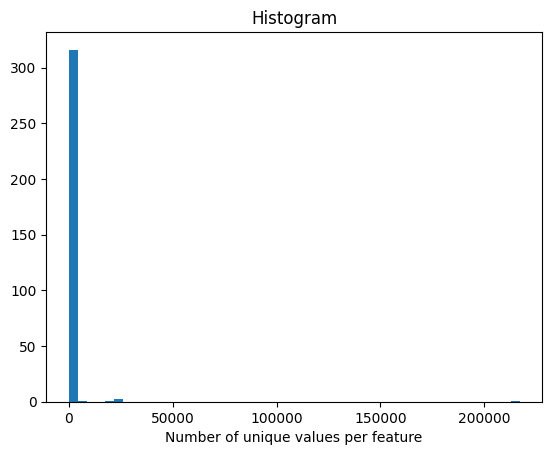

In [99]:
plt.hist(x, bins=50)
ax = plt.gca()
#ax.set_ylim([0, 10])
#ax.set_xlim([0, 3000])
plt.xlabel('Number of unique values per feature')
#plt.ylabel('y') 
plt.title('Histogram')
plt.show() 

In [120]:
np_x = np.array(x)
threshold = 1000
clipped_data_low = np_x[np_x < threshold]
clipped_data_high = np_x[np_x >= threshold]
print(clipped_data_low.size)
print("SUM: ", np.sum(clipped_data_low))
print(clipped_data_low)
print(clipped_data_high.size)
print(clipped_data_high)
both = np.concatenate((np.array(letters), np_x), axis=0)
print(both[:100])

310
SUM:  12949
[ 53  12 414  12  31   2   2   2   3   2   2   3   3  17  13  12   2   2
   3   3   2   3   5  26   8  34  33  34   4   5   5   8   7   5   4   7
   5   4   4   5   5   4   4   5   4   4   7  99   2   7   7   5   5   9
   5   5   9  26  11   5 551 143   5   5   5   5   5   5   5   5   5   6
   5  11   6  41  49  44  59 110 135 109 116 104 134   5  78 116 195  79
 100 169 102   5   5   6  14   9   5  29  14   5   5 413  12   5   6   4
  80  73  48  42  46   8   5   5   6  18   8   7  16   5   5   9   5   9
   8   8  11   9   5   5   4   4   5   8   8   8   8   5   5 137   5  73
   4   9  12  19  26   9   8   7  10   5   5   5   6   5   4   5   7   5
   5   5   7   6   6   5   5   8   5   8   5   8   5   5   8   5   8   5
   5   9   5   5   5   5   8   8   6   9   9   9   7  94   7  93   7   7
   4   9   5   5   8   7  18  18  18  18  18  18  18  18   5   5   8   4
   5  12   4  10  10   3 107   3   3   3   4   4   3   3   4   3  10   9
   3   9   3   6   6  14   3  63   

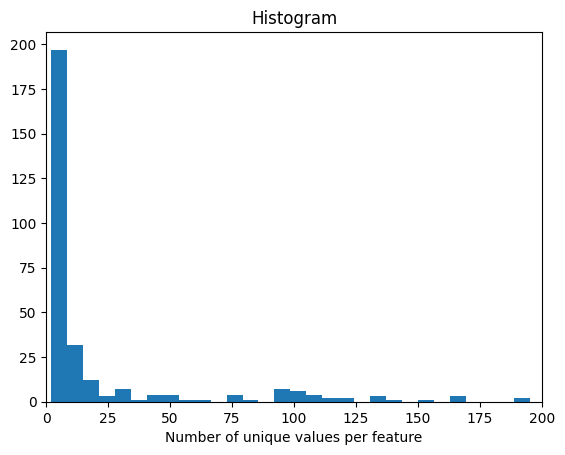

In [91]:
plt.hist(clipped_data_low, bins=30)
ax = plt.gca()
#ax.set_ylim([0, 10])
ax.set_xlim([0, 200])
plt.xlabel('Number of unique values per feature')
#plt.ylabel('y') 
plt.title('Histogram')
plt.show() 

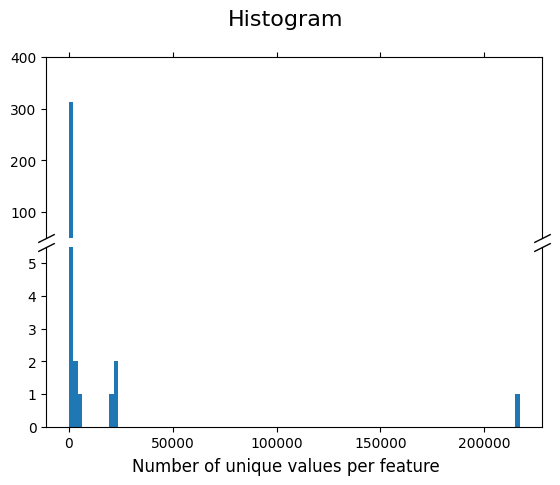

In [112]:
np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.hist(x, bins=100)
ax2.hist(x, bins=100)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(50, 400)  # outliers only
ax2.set_ylim(0, 5.5)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

#plt.xlabel('Number of unique values per feature')
#plt.ylabel('y') 
fig.suptitle('Histogram', fontsize=16)
fig.supxlabel('Number of unique values per feature')
plt.show()

In [8]:
# Counting the number of NaN values for each feature

num_NaN_per_feature = []
for ind in range(x_train.shape[1]):
    num_NaN = np. count_nonzero(np. isnan(x_train[:, ind]))
    num_NaN_per_feature.append(num_NaN)

In [4]:
print(num_NaN_per_feature)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 139415, 139415, 328103, 139416, 139415, 328103, 139433, 139524, 139525, 188720, 188720, 188721, 188720, 327334, 188719, 189287, 192544, 2, 1, 0, 159860, 0, 0, 1, 1, 1, 196334, 0, 43801, 43801, 0, 0, 284153, 1, 0, 0, 1, 0, 0, 5, 285915, 0, 0, 0, 0, 139415, 318245, 139415, 1, 0, 3, 2471, 3207, 3946, 4407, 279663, 6933, 7743, 8293, 8728, 9149, 9432, 9862, 10541, 191379, 282510, 237369, 11007, 11765, 170906, 171212, 171522, 20738, 21567, 22468, 23149, 23759, 24502, 26205, 107829, 109141, 109407, 109690, 181261, 181400, 28647, 226907, 227043, 227197, 229088, 29911, 30600, 186763, 186001, 31022, 32080, 243418, 243561, 266689, 266689, 306425, 306426, 306428, 306429, 306429, 306629, 306429, 306430, 306430, 247299, 310302, 310320, 310346, 310367, 310392, 310403, 310450, 265347, 325762, 325769, 325769, 327339, 326264, 325775, 325777, 325777, 325780, 241493, 318477, 318489, 325051, 318505, 318515, 297518, 309300, 297543, 327354, 327645, 327907, 327907, 327648, 327648, 

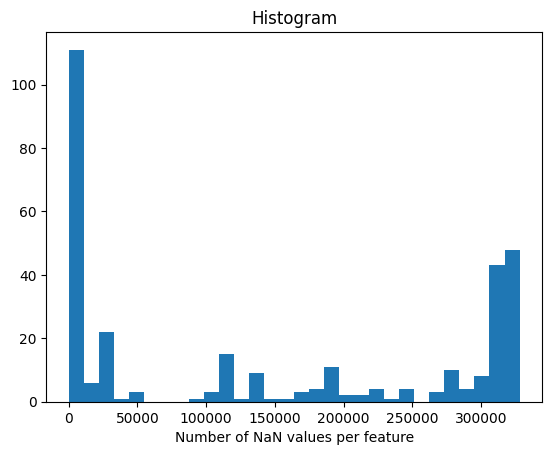

In [16]:
plt.hist(num_NaN_per_feature, bins=30)
ax = plt.gca()
#ax.set_ylim([0, 10])
#ax.set_xlim([0, 200])
plt.xlabel('Number of NaN values per feature')
#plt.ylabel('y') 
plt.title('Histogram')
plt.show() 

In [9]:
# Counting the number of NaN values for each point

num_NaN_per_point = []
for ind in range(x_train.shape[0]):
    num_NaN = np. count_nonzero(np. isnan(x_train[ind, :]))
    num_NaN_per_point.append(num_NaN)

In [10]:
print(num_NaN_per_point)

[132, 184, 135, 132, 149, 146, 134, 153, 139, 168, 188, 152, 169, 183, 129, 136, 137, 136, 140, 132, 164, 152, 190, 129, 207, 138, 142, 118, 125, 146, 130, 134, 116, 121, 146, 140, 120, 148, 171, 135, 137, 155, 137, 127, 143, 134, 141, 133, 132, 126, 148, 134, 157, 154, 175, 135, 124, 149, 136, 126, 154, 158, 138, 162, 146, 103, 131, 159, 142, 189, 123, 129, 143, 133, 122, 132, 155, 132, 142, 129, 114, 165, 116, 110, 153, 139, 141, 140, 147, 134, 135, 141, 157, 131, 147, 175, 142, 118, 200, 123, 146, 183, 122, 200, 132, 144, 165, 149, 138, 123, 133, 140, 208, 154, 144, 123, 151, 164, 138, 157, 139, 142, 196, 143, 140, 140, 148, 185, 131, 140, 152, 184, 135, 186, 152, 183, 142, 153, 136, 136, 149, 143, 137, 142, 133, 148, 151, 127, 151, 140, 146, 141, 146, 138, 177, 128, 124, 158, 138, 131, 139, 186, 160, 142, 153, 128, 145, 172, 139, 156, 149, 160, 138, 138, 125, 156, 152, 137, 164, 132, 123, 154, 154, 165, 123, 129, 155, 127, 112, 162, 134, 126, 131, 166, 132, 141, 142, 139, 171, 159,

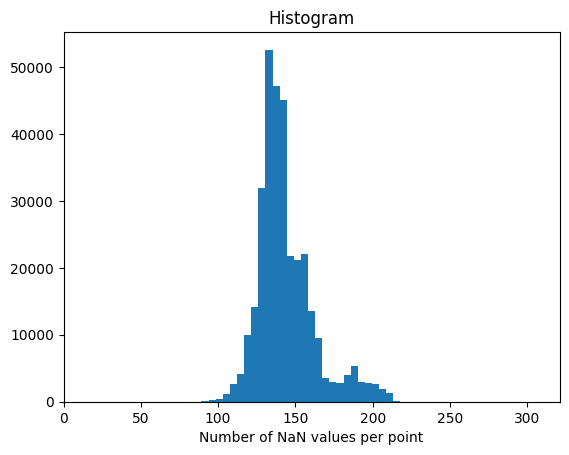

In [14]:
plt.hist(num_NaN_per_point, bins=30)
ax = plt.gca()
#ax.set_ylim([0, 10])
ax.set_xlim([0, 321])
plt.xlabel('Number of NaN values per point')
#plt.ylabel('y') 
plt.title('Histogram')
plt.show() 

In [26]:
# Determining the features which features have less than a certain percentage of NaN values. 

max_percentage_NaN_values = 0.8
max_values_NaN = int(max_percentage_NaN_values*x_train.shape[0])
features_NaN_threshold = []
for ind in range(x_train.shape[1]):
    num_NaN = np.count_nonzero(np.isnan(x_train[:, ind]))
    if num_NaN < max_values_NaN:
        features_NaN_threshold.append(ind)

In [27]:
print(max_values_NaN)

262508


In [28]:
# Counting the number of NaN values for each feature below the NaN threshold

num_NaN_per_feature_threshold = []
for ind in features_NaN_threshold:
    num_NaN = np.count_nonzero(np.isnan(x_train[:, ind]))
    num_NaN_per_feature_threshold.append(num_NaN)

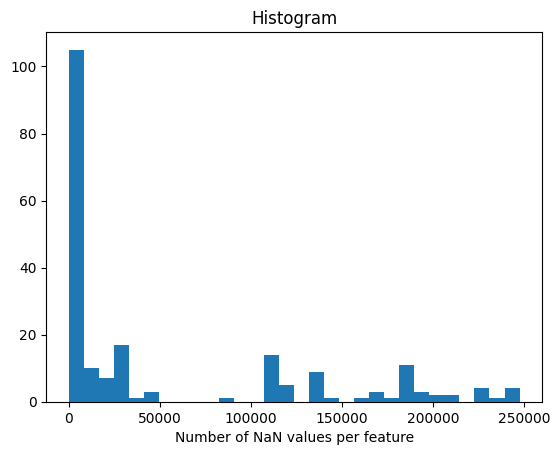

In [29]:
plt.hist(num_NaN_per_feature_threshold, bins=30)
ax = plt.gca()
#ax.set_ylim([0, 10])
#ax.set_xlim([0, 200])
plt.xlabel('Number of NaN values per feature')
#plt.ylabel('y') 
plt.title('Histogram')
plt.show() 

In [221]:
"""
# Counting the number of NaN values for each feature

num_NaN_per_feature = []
for ind in range(x_train.shape[1]):
    num_NaN = np. count_nonzero(np. isnan(x_train[:, ind]))
    num_NaN_per_feature.append(num_NaN)


# Counting the number of NaN values for each point

num_NaN_per_point = []
for ind in range(x_train.shape[0]):
    num_NaN = np. count_nonzero(np. isnan(x_train[ind, :]))
    num_NaN_per_point.append(num_NaN)

In [23]: a = [1,5,6]
In [24]: b = np.zeros(10, dtype=bool)
In [25]: b[a] = True
"""

# the threshold is the maximal percentage of NaN values for a given feature
# if the feature contains a higher percentage of NaN values than the threshold, the feature will be sorted out
thresholds = np.array([0.2, 0.5, 0.8, 1.0])
max_num_NaN_per_features = (thresholds*x_train.shape[0]).astype(int)

# counting the number of NaN values for each feature
num_NaN_per_feature = []
for ind in range(x_train.shape[1]):
    num_NaN = np. count_nonzero(np. isnan(x_train[:, ind]))
    num_NaN_per_feature.append(num_NaN)

# creating a binary matrix of features to be included for each threshold
#included_features = np.zeros((len(threshold), x_train.shape[1]))

num_features_per_threshold= [] #for plotting
num_NaN_per_point_and_threshold = []
isNaN = np.isnan(x_train)
for max_num_NaN_per_feature in max_num_NaN_per_features:
    included_features = num_NaN_per_feature <= max_num_NaN_per_feature
    num_features_per_threshold.append(np.count_nonzero(included_features))
    isNaN_for_threshold = (isNaN*included_features)
    num_NaN_per_point = []
    for ind in range(isNaN_for_threshold.shape[0]):
        num_NaN = np.count_nonzero(isNaN_for_threshold[ind, :])
        num_NaN_per_point.append(num_NaN)
    num_NaN_per_point_and_threshold.append(num_NaN_per_point)

In [222]:
print(num_features_per_threshold)

[143, 174, 205, 321]


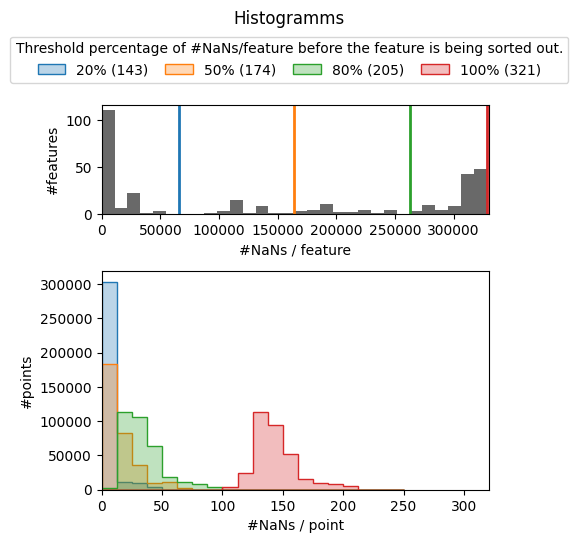

In [254]:
fig, axs = plt.subplots(2, height_ratios=[1, 2], figsize=(5,5))
plt.subplots_adjust(hspace=0.35)
fig.suptitle('Histogramms', y=1.07)

axs[0].hist(num_NaN_per_feature, bins=30, color="dimgray")
#ax.set_ylim([0, 10])
axs[0].set_xlim([0, int(x_train.shape[0]*1.007)])
axs[0].set_xlabel('#NaNs / feature')
axs[0].set_ylabel('#features') 
#plt.title('Histogram')
for ind, max_num_NaN_per_feature in enumerate(max_num_NaN_per_features):
    axs[0].axvline(max_num_NaN_per_feature, lw=2, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][ind])

for ind, data in enumerate(num_NaN_per_point_and_threshold):
    axs[1].hist(data, 
                bins=20, 
                range=(0, 250), 
                color=(plt.rcParams['axes.prop_cycle'].by_key()['color'][ind], 0.3), 
                histtype='stepfilled', 
                ec=(plt.rcParams['axes.prop_cycle'].by_key()['color'][ind], 1.0), 
                label= str(int(thresholds[ind]*100.0))+"% (" + str(num_features_per_threshold[ind]) + ")" )
    # alpha=1.0/(ind*.5+1.0)
#axs[1] = plt.gca()
#ax.set_ylim([0, 60000])
axs[1].set_xlim([0, 321])
axs[1].set_xlabel('#NaNs / point')
axs[1].set_ylabel('#points') 
#axs[1].set_title('Histogram')
#axs[1].legend(title="Max NaN ratio threshold")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncols=4, columnspacing=1.2, title="Threshold percentage of #NaNs/feature before the feature is being sorted out.")
# bbox_to_anchor=(0.85, 1.02, 0.5, 0.05), ncols=2, columnspacing=.5,
plt.show() 

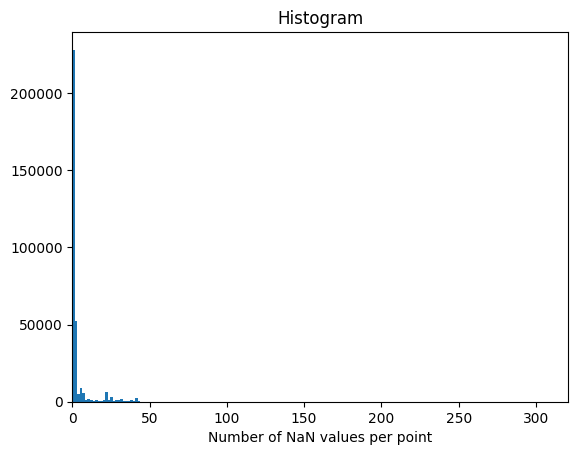

In [89]:
plt.hist(num_NaN_per_point_and_threshold[0], bins=30)
ax = plt.gca()
#ax.set_ylim([0, 10])
ax.set_xlim([0, 321])
plt.xlabel('Number of NaN values per point')
#plt.ylabel('y') 
plt.title('Histogram')
plt.show() 

In [230]:
for ind, data in enumerate(num_NaN_per_point_and_threshold):
    #str(int(thresholds[ind]*100.0))+"% (" + str(num_features_per_threshold[ind]) ")"
    print(str(int(thresholds[ind]*100.0))+"%")

20%
50%
80%
100%
